In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path =r'C:\Users\jadep\Documents\Career Foundry\Achievement 6\Human Trafficking'

In [3]:
df=pd.read_csv(os.path.join(path,'Data','victims_and_exploits.csv'),index_col=False)

In [4]:
#correlation matrix
df.corr()

Unnamed: 0    female      male  grand total  total victims  \
Unnamed: 0        1.000000  0.382910  0.355672     0.376748       0.367577   
female            0.382910  1.000000  0.967843     0.996625       0.941183   
male              0.355672  0.967843  1.000000     0.985226       0.931551   
grand total       0.376748  0.996625  0.985226     1.000000       0.944740   
total victims     0.367577  0.941183  0.931551     0.944740       1.000000   
forced labour     0.294608  0.895500  0.941359     0.916840       0.950106   
sexual exploit    0.402565  0.893767  0.844424     0.884028       0.961260   

                forced labour  sexual exploit  
Unnamed: 0           0.294608        0.402565  
female               0.895500        0.893767  
male                 0.941359        0.844424  
grand total          0.916840        0.884028  
total victims        0.950106        0.961260  
forced labour        1.000000        0.830362  
sexual exploit       0.830362        1.000000

In [5]:
df.rename(columns = {'Unnamed:0' : 'citizenship'}, inplace = True)

reasonably strong correlation between country of origin and sexual exploitation and being male and trafficked for forced labour, while females show a stronger correlation for being trafficked for sexual exploit.

C:\Users\jadep\Anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


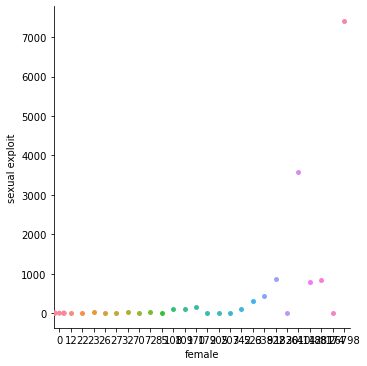

In [52]:
sns.catplot(x="female", y="sexual exploit", kind="swarm", data=df)

a higher correlation exists in being female and being trafficked for sexual exploitation

hypothesis: Being female creates a higher risk of being trafficked for sexual exploitation

In [22]:
df_2=df[:31]

In [23]:
df_2

Unnamed: 0 citizenship  female  male  grand total  total victims  \
0            0          AF       0    97           97             97   
1            1          AL      22     0           22             22   
2            2          BG     342     0          342            116   
3            3          BY     523   940         1463            822   
4            4          CN      23     0           23             23   
5            5          CO     109    15          124            111   
6            6          ER       0    13           13             13   
7            7          GH     207   337          544            544   
8            8          GN       0    15           15             15   
9            9          GW       0   145          145             21   
10          10          HT     205   134          339            274   
11          11          ID    1820   151         1971           1629   
12          12          KE      32     0           32             32   
13          13          KG      70   367          437            286   
14          14          KH     922  1057         1979           1044   
15          15          KR      12     0           12             12   
16          16          LK      85     0           85             85   
17          17          MD    4881  1020         5901           1408   
18          18          MM      26  1224         1250           1250   
19          19          MX       0    19           19             19   
20          20          NG     108     0          108            108   
21          21          NP      27     0           27             27   
22          22          PH    8174  3191        11365             72   
23          23          RO     638    17          655            457   
24          24          SN       0    70           70             12   
25          25          TH       0    55           55             55   
26          26          UA    4112  3649         7761           2507   
27          27          UG      72    26           98             98   
28          28          US    3610    26         3636           3591   
29          29          UZ     179    82          261            104   
30          30          VN     170     0          170            170   

    forced labour  sexual exploit _merge  
0              97               0   both  
1               0               0   both  
2               0             116   both  
3             606             307   both  
4               0              23   both  
5               0             111   both  
6               0               0   both  
7             544               0   both  
8               0               0   both  
9              21               0   both  
10            274               0   both  
11           1488               0   both  
12             32              32   both  
13            286               0   both  
14            147             866   both  
15              0              12   both  
16             85               0   both  
17             12             832   both  
18           1250               0   both  
19             19               0   both  
20              0             108   both  
21             27               0   both  
22             41               0   both  
23             38             440   both  
24             12               0   both  
25             55               0   both  
26           1772             788   both  
27             70              28   both  
28              0            3591   both  
29             26               0   both  
30              0             154   both

In [35]:
#regression analysis
X = df_2['female'].values.reshape(-1,1)
y = df_2['sexual exploit'].values.reshape(-1,1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
regression = LinearRegression()

In [38]:

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
y_predicted = regression.predict(X_test)

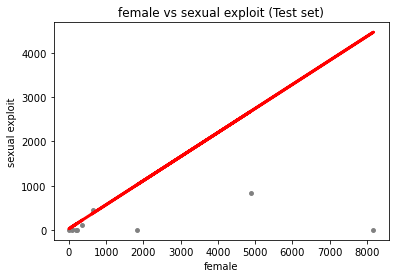

In [40]:

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('female vs sexual exploit (Test set)')
plot_test.xlabel('female')
plot_test.ylabel('sexual exploit')
plot_test.show()

In [42]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.54370081]]
Mean squared error:  2449390.3874615068
R2 score:  -34.01337969012319


In [44]:
#compare predicted values with actual values
y_predicted

array([[ 212.68454851],
       [ 124.06131598],
       [  64.79792736],
       [ 138.19753712],
       [  65.88532899],
       [  26.73887045],
       [4470.94931619],
       [1016.27435017],
       [2680.54253887],
       [ 373.61998916]])

In [46]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual    Predicted
0     116   212.684549
1       0   124.061316
2       0    64.797927
3       0   138.197537
4      28    65.885329
5       0    26.738870
6       0  4470.949316
7       0  1016.274350
8     832  2680.542539
9     440   373.619989

In [47]:
#regression run on training data
y_predicted_train = regression.predict(X_train)

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.54370081]]
Mean squared error:  232862.6229555584
R2 score:  0.6149549235896374


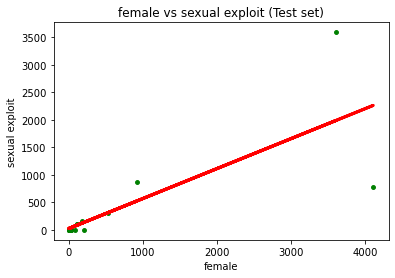

In [50]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('female vs sexual exploit (Test set)')
plot_test.xlabel('female')
plot_test.ylabel('sexual exploit')
plot_test.show()

Conclusions:

while the model doesn't fit very well, it is a regression on data that is somewhat categorical. Clearly, the predicted values and actual values are far from each other. Mean squared error and R2 values are clearly indicating that the model is not very good. The R2 value as determined by the fit run on the test data does produce a better value, suggesting that there is some value in the model. While the hypothesis is not able to be supported fully by the data, there information to be gleaned from the model. The more girls that are taken into trafficking, the more it can be expected to find them in sexually exploitative roles. Targeting industries that trade in sex: pornography, prostitution,drugs, to reduce their need for women and girls in these roles could impact the number of women/girls taken and trafficked for these purposes.